# Keras Sequential vs Functional API

In [2]:
from tensorflow.keras import Input, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,concatenate
from tensorflow.keras.utils import plot_model

### Sequential API

The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

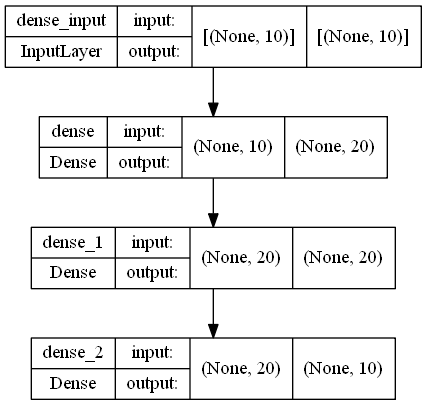

In [3]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(10,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))   
plot_model(model,show_shapes = True, show_layer_names = True)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


### Functional API

The Keras functional API provides a more flexible way for defining models.

It specifically allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define adhoc acyclic network graphs.

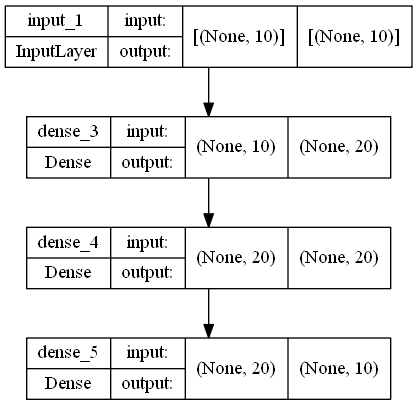

In [5]:
inputs = Input(shape=(10,))

# A layer instance is callable on a tensor, and returns a tensor.
x = Dense(20, activation='relu')(inputs)
x = Dense(20, activation='relu')(x)

predictions = Dense(10, activation='softmax')(x)

# Instantiate the model given inputs and outputs.
model = Model(inputs=inputs, outputs=predictions)
plot_model(model,show_shapes = True, show_layer_names = True)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________
